In [253]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import numpy as np
#%matplotlib inline

In [101]:
df_crime = pd.read_csv('csv_crime/qol-safety.csv')
df_engagement = pd.read_csv('csv_demo/qol-engagement.csv')
df_character = pd.read_csv('csv_demo/qol-character.csv')
df_economy = pd.read_csv('csv_eco/qol-economy.csv')
df_education = pd.read_csv('csv_edu/qol-education.csv')
df_health = pd.read_csv('csv_health/qol-health.csv')
df_env = pd.read_csv('csv_health/qol-environment.csv')
df_housing = pd.read_csv('csv_housing/qol-housing.csv')
df_transp = pd.read_csv('csv_transport/qol-transportation.csv')


In [180]:
filter_col_2012 = [col for col in merge_table if col.endswith('2012')]

Index(['NPA', 'Housing_Density_2017', 'Housing_Units_2017',
       'Housing_Density_2016', 'Housing_Units_2016', 'Housing_Density_2015',
       'Housing_Units_2015', 'Housing_Density_2013', 'Housing_Units_2013',
       'Housing_Density_2011', 'Housing_Units_2011',
       'Single_Family_Housing_2017', 'Single_Family_Units_2017',
       'Single_Family_Housing_2016', 'Single_Family_Units_2016',
       'Single_Family_Housing_2015', 'Single_Family_Units_2015',
       'Single_Family_Housing_2013', 'Single_Family_Units_2013',
       'Single_Family_Housing_2011', 'Single_Family_Units_2011',
       'Housing_Size_2017', 'Housing_Size_2016', 'Housing_Size_2015',
       'Housing_Size_2013', 'Housing_Size_2011', 'Housing_Age_2017',
       'Housing_Age_2016', 'Housing_Age_2015', 'Housing_Age_2013',
       'Housing_Age_2011', 'Rental_Houses_2016', 'Rental_Houses_Units_2016',
       'Rental_Houses_2015', 'Rental_Houses_Units_2015', 'Rental_Houses_2013',
       'Rental_Houses_Units_2013', 'New_Resident

In [102]:
merge_table = pd.merge(df_crime,df_engagement, on="NPA")
merge_table = pd.merge(merge_table,df_character, on="NPA")
merge_table = pd.merge(merge_table,df_economy, on="NPA")
merge_table = pd.merge(merge_table,df_education, on="NPA")
merge_table = pd.merge(merge_table,df_health, on="NPA")
merge_table = pd.merge(merge_table,df_env, on="NPA")
merge_table = pd.merge(merge_table,df_housing, on="NPA")
merge_table = pd.merge(merge_table,df_transp, on="NPA")

merge_table.to_csv('merged.csv')

In [107]:
merge_table=merge_table.set_index('NPA')

69

In [130]:
filter_col_2013 = [col for col in merge_table if col.endswith('2013')]
filter_col_2014 = [col for col in merge_table if col.endswith('2014')]
filter_col_2015 = [col for col in merge_table if col.endswith('2015')]
filter_col_2016 = [col for col in merge_table if col.endswith('2016')]
filter_col_2011 = [col for col in merge_table if col.endswith('2011')]
filter_col_2012 = [col for col in merge_table if col.endswith('2012')]



In [222]:
data_2011=merge_table[filter_col_2011]
data_2012=merge_table[filter_col_2012]
data_2013=merge_table[filter_col_2013]
data_2014=merge_table[filter_col_2014]
data_2015=merge_table[filter_col_2015]
data_2016=merge_table[filter_col_2016]


In [223]:
data_2015.columns.values

array(['Violent_Crime_Rate_2015', 'Violent_Crimes_2015',
       'Property_Crime_Rate_2015', 'Property_Crimes_2015',
       'Disorder_Call_Rate_2015', 'Disorder_Calls_2015',
       'Animal_Control_Call_Rate_2015', 'Animal_Control_Calls_2015',
       'Fire_Call_Rate_2015', 'Fire_Calls_2015',
       'Nuisance_Violations_2015', 'Nuisance_Violations_Total_2015',
       '311_Requests_2015', '311_Calls_2015', 'Voter_Participation_2015',
       'Voters_Participating_2015', 'Neighborhood_Organizations_2015',
       'Population_Density_2015', 'Population _2015',
       'Age_of_Residents_2015', 'Age_of_Residents_moe_2015',
       'Youth_Population_2015', 'Youth_Population_moe_2015',
       'Older_Adult_Population_2015', 'Older_Adult_Population_moe_2015',
       'Vacant_Land_2015', 'Vacant_Land_Area_2015',
       'Household_Income_2015', 'Household_Income_moe_2015',
       'Public_Nutrition_Assistance_2015', 'Employment_Rate_2015',
       'Employment_Rate_moe_2015', 'Job_Density_2015', 'Jobs_2015'

In [235]:
data_2015.to_csv("data_2015.csv")

In [215]:
#plt.matshow(data_2012.corr())
corr=data_2015.corr().abs()
s = corr.unstack()
#print(s)
so = s.sort_values(ascending=False,kind="quicksort")
#print(so)

In [229]:
Q1 = data_2015.quantile(0.25)
Q3 = data_2015.quantile(0.75)
IQR = Q3 - Q1
mask=((data_2015 < (Q1 - 1.5 * IQR)) | (data_2015 > (Q3 + 1.5 * IQR)))
data_2015[mask] = np.nan

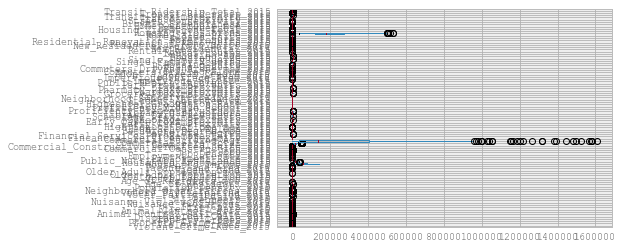

In [230]:
import matplotlib.pyplot as plt
pd.options.display.mpl_style = 'default'
cols=['Violent_Crime_Rate_2015', 'Violent_Crimes_2015',
       'Property_Crime_Rate_2015', 'Property_Crimes_2015',
       'Disorder_Call_Rate_2015', 'Disorder_Calls_2015',
       'Animal_Control_Call_Rate_2015', 'Animal_Control_Calls_2015',
       'Fire_Call_Rate_2015', 'Fire_Calls_2015',
       'Nuisance_Violations_2015', 'Nuisance_Violations_Total_2015',
       '311_Requests_2015', '311_Calls_2015', 'Voter_Participation_2015',
       'Voters_Participating_2015', 'Neighborhood_Organizations_2015',
       'Population_Density_2015', 'Population _2015',
       'Age_of_Residents_2015', 'Age_of_Residents_moe_2015',
       'Youth_Population_2015', 'Youth_Population_moe_2015',
       'Older_Adult_Population_2015', 'Older_Adult_Population_moe_2015',
       'Vacant_Land_2015', 'Vacant_Land_Area_2015',
       'Household_Income_2015', 'Household_Income_moe_2015',
       'Public_Nutrition_Assistance_2015', 'Employment_Rate_2015',
       'Employment_Rate_moe_2015', 'Job_Density_2015', 'Jobs_2015',
       'Commercial_Construction_2015',
       'Commercial_Construction_Permitted_Units_2015',
       'Commercial_Size_2015', 'Commercial_Size_Total_2015',
       'Commercial_Building_Age_2015',
       'Fincancial_Services_Proximity_2015',
       'Financial_Services_Proximate_Units_2015', 'Bachelors_Degree_2015',
       'Bachelors_Degree_moe_2015', 'High_School_Diploma_2015',
       'High_School_Diploma_moe_2015', 'Early_Care_Proximity_2015',
       'Early_Care_Proximate_Units_2015', 'SchoolAge_Proximity_2015',
       'SchoolAge_Proximate_Units_2015', 'Library_Card_Prevalence_2015',
       'Library_Card_Holders_2015', 'Proficiency_Elementary_School_2015',
       'Proficiency_Middle_School_2015', 'Proficiency_High_School_2015',
       'Highschool_Graduation_Rate_2015', 'Student_Absenteeism_2015',
       'Neighborhood_School_Attendance_2015', 'Grocery_Proximity_2015',
       'Grocery_Proximate_Units_2015', 'Pharmacy_Proximity_2015',
       'Pharmacy_Proximate_Units_2015', 'Park_Proximity_2015',
       'Park_Proximate_Units_2015', 'Public_Health_Insurance _2015',
       'Impervious_Surface_2015', 'Impervious_Surface_Area_2015',
       'Adopt_a_Stream_2015', 'Adopt_a_Stream_Length_2015',
       'Commuters_Driving_Alone_2015', 'Commuters_Driving_Alone_moe_2015',
       'Housing_Density_2015', 'Housing_Units_2015',
       'Single_Family_Housing_2015', 'Single_Family_Units_2015',
       'Housing_Size_2015', 'Housing_Age_2015', 'Rental_Houses_2015',
       'Rental_Houses_Units_2015', 'New_Residential_2015',
       'New_Residential_Permit_Units_2015', 'Residential_Renovation_2015',
       'Residential_Renovation_Permit_Units_2015', 'Foreclosures_2015',
       'Foreclosed_Units_2015', 'Home_Sales_Price_2015',
       'Housing_Violations_2015', 'Housing_Violations_Total_2015',
       'Home_Ownership_2015', 'Home_Ownership_moe_2015',
       'Bicycle_Friendliness_2015', 'Street_Connectivity_2015',
       'Transit_Proximity_2015', 'Transit_Proximate_Units_2015',
       'Transit_Ridership_2015', 'Transit_Ridership_Total_2015']
data_2015.boxplot(column=cols,vert=False)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000232B8B4D6D8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000232BC23A5C0>]], dtype=object)

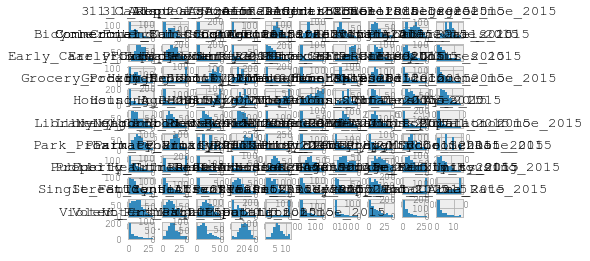

In [231]:
data_2015['House_Sale']

In [242]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(data_2015.iloc[:, :])
data_2015.iloc[:, :] = imputer.transform(data_2015.iloc[:, :])

In [287]:
#(data_2015.isnull().any()).values
y=data_2015["Home_Sales_Price_2015"]

In [272]:
X=(data_2015.drop(["Home_Sales_Price_2015"], axis=1))


np.arange(0,len(X.columns))

In [300]:
data_2015.shape

(462, 95)

In [304]:
X=pd.DataFrame(X)

In [317]:
X=X.reset_index()


(462, 96)

KeyError: 0

In [315]:
import statsmodels.formula.api as sm
def backwardElimination(x, sl):
    numVars = 95
    for i in range(1, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
SL = 0.05
X_Modeled = backwardElimination(X, SL)

ValueError: Shape of passed values is (93, 462), indices imply (94, 462)